<center><h2>Interactive Forward Pass Example</h2></center>

## Learning Objectives
- Describe each component of the single-hidden-neuron network shown in the playground
- Compute the hidden linear combination and output probability for a batch of points
- Build intuition for how weights and biases reshape the decision boundary

Use the configured TensorFlow Playground: [Playground Link](https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.25736&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


## Architecture Overview
The model uses two input features `x1` and `x2`, a single hidden neuron with a linear activation (identity), and one output neuron with a logistic activation for binary classification.

The forward pass performs these steps:
1. Hidden linear combination: `z_h = w_1 x_1 + w_2 x_2 + b_h`
2. Hidden activation (identity): `a_h = z_h`
3. Output logit: `z_o = a_h w_o + b_o`
4. Output probability: `y_hat = sigma(z_o) = 1 / (1 + exp(-z_o))`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Markdown

plt.style.use("seaborn-v0_8")

## Generate the Playground-Inspired Dataset
We approximate the Gaussian classification dataset from the playground by sampling two clusters. Run the cell below to build the feature matrix `X` and labels `y`.

In [2]:
rng = np.random.default_rng(25736)

n_samples = 100
class_size = n_samples // 2

mean_left = np.array([-0.7, -0.7])
mean_right = np.array([0.7, 0.7])
covariance = np.array([[0.25, 0.0], [0.0, 0.25]])

class_zero = rng.multivariate_normal(mean_left, covariance, class_size)
class_one = rng.multivariate_normal(mean_right, covariance, class_size)

X = np.vstack((class_zero, class_one))
y = np.concatenate((np.zeros(class_size, dtype=int), np.ones(class_size, dtype=int)))

X[:5], y[:5]

(array([[-1.49247332, -0.58794334],
        [-0.98366562, -0.60499847],
        [-0.8982072 , -1.19521664],
        [-1.1154112 , -0.28636007],
        [-0.64551465,  0.11570295]]),
 array([0, 0, 0, 0, 0]))

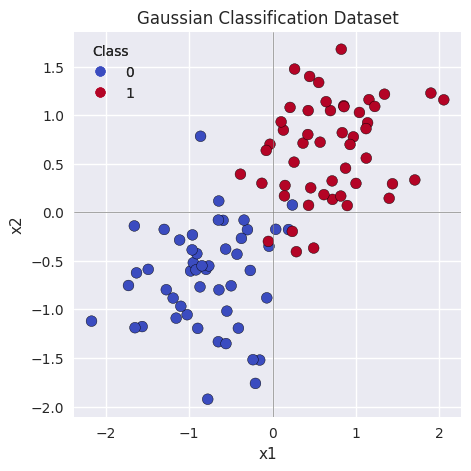

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor="k", s=60)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Gaussian Classification Dataset")
ax.axhline(0, color="gray", linewidth=0.5)
ax.axvline(0, color="gray", linewidth=0.5)

legend1 = ax.legend(*scatter.legend_elements(), title="Class")
ax.add_artist(legend1)
plt.show()

## Helper Functions
Below we define the logistic function and a convenience helper that computes every intermediate quantity for a single sample.

In [4]:
def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def forward_pass_single(x_vector, w_hidden, b_hidden, w_out, b_out):
    linear_hidden = np.dot(x_vector, w_hidden) + b_hidden
    hidden_activation = linear_hidden
    logit = hidden_activation * w_out + b_out
    probability = logistic(logit)
    return linear_hidden, hidden_activation, logit, probability

## Interactive Playground

Use the sliders to explore how the weights and biases transform the dataset. The middle panel shows the hidden neuron's linear response, while the right panel shows the predicted class after applying the logistic output.

In [19]:
def visualize_forward(
    w1=-.3,
    w2=.15,
    b_hidden=0.0,
    w_out=-0.29,
    b_out=0.0,
    sample_x1=0,
    sample_x2=0,
):
    # Ensure scalars

    weights_hidden = np.array([w1, w2])

    # Batch computations
    hidden_linear = X @ weights_hidden + b_hidden
    hidden_activation = hidden_linear
    logits = hidden_activation * w_out + b_out
    probabilities = logistic(logits)
    predictions = (probabilities >= 0.5).astype(int)

    # Sample computations (independent of indexing into X)
    sample_point = np.array([sample_x1, sample_x2])
    sample_hidden_linear = sample_point @ weights_hidden + b_hidden
    sample_hidden_activation = sample_hidden_linear
    sample_logit = sample_hidden_activation * w_out + b_out
    sample_prob = logistic(sample_logit)
    sample_pred = int(sample_prob >= 0.5)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm_r, edgecolor="k", s=60)
    axes[0].scatter(sample_x1, sample_x2, c="gold", edgecolor="k", s=140, marker="*")
    axes[0].set_title("Ground Truth")
    axes[0].set_xlabel("x1")
    axes[0].set_ylabel("x2")

    scatter_hidden = axes[1].scatter(
        X[:, 0], X[:, 1], c=hidden_activation, cmap="coolwarm_r", edgecolor="k", s=60
    )
    axes[1].scatter(sample_x1, sample_x2, c="gold", edgecolor="k", s=140, marker="*")
    axes[1].set_title("Hidden Linear Output")
    axes[1].set_xlabel("x1")
    axes[1].set_ylabel("x2")
    fig.colorbar(scatter_hidden, ax=axes[1], fraction=0.046, pad=0.04)

    axes[2].scatter(
        X[:, 0], X[:, 1], c=predictions, cmap=plt.cm.coolwarm_r, edgecolor="k", s=60
    )
    axes[2].scatter(sample_x1, sample_x2, c="gold", edgecolor="k", s=140, marker="*")
    axes[2].set_title("Predicted Class (>= 0.5)")
    axes[2].set_xlabel("x1")
    axes[2].set_ylabel("x2")

    for ax in axes:
        ax.axhline(0, color="gray", linewidth=0.5)
        ax.axvline(0, color="gray", linewidth=0.5)

    plt.tight_layout()
    plt.show()

    details = (
        f"**Sample Point**<br>"
        f"Input vector: [{sample_x1:.3f}, {sample_x2:.3f}]<br>"
        f"Hidden linear output: {sample_hidden_linear:.3f}<br>"
        f"Output logit: {sample_logit:.3f}<br>"
        f"Predicted probability: {sample_prob:.3f}<br>"
        f"Predicted class: {sample_pred}"
    )
    display(Markdown(details))

In [20]:
widgets.interact(
    visualize_forward,
    w1=widgets.FloatSlider(value=0.3, min=-6.0, max=6.0, step=0.01, description="w1"),
    w2=widgets.FloatSlider(value=-.15, min=-6.0, max=6.0, step=0.01, description="w2"),
    b_hidden=widgets.FloatSlider(value=0.10, min=-5.0, max=5.0, step=0.01, description="b_hidden"),
    w_out=widgets.FloatSlider(value=-0.29, min=-10.0, max=10.0, step=0.01, description="w_out"),
    b_out=widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.01, description="b_out"),
    sample_x1=widgets.FloatSlider(value=-3, min=-3.0, max=3.0, step=0.01, description="sample_x1"),
    sample_x2=widgets.FloatSlider(value=-3, min=-3.0, max=3.0, step=0.01, description="sample_x2"),
)

interactive(children=(FloatSlider(value=0.3, description='w1', max=6.0, min=-6.0, step=0.01), FloatSlider(valu…

<function __main__.visualize_forward(w1=-0.3, w2=0.15, b_hidden=0.0, w_out=-0.29, b_out=0.0, sample_x1=0, sample_x2=0)>